In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob

def create_forex_df(all_files_glob=glob("data/*.xls")):

    all_files = all_files_glob

    li = []

    for filename in all_files:
        tdf = pd.read_excel(filename, skiprows=5, na_values=['CLOSED', 'closed', 'Closed', ' --']).drop([0,1,2,3,4])
        tdf = tdf.rename(columns={'Units':'Date'})

        # Convert Date to Datetime type
        tdf['Date'] = pd.to_datetime(tdf['Date'])

        # Create time series index
        tdf = tdf.set_index('Date', drop=True)
        li.append(tdf)

    df = pd.concat(li, axis=0, sort=False)
    
    return df

In [2]:
data = create_forex_df()
USD = data[['USD']]

sim_subset = USD.tail(20)
obs_subset = USD.iloc[-80:-20]

In [3]:
def buy_usd(aud_amt, exchange_rate):
    return aud_amt * exchange_rate

def buy_aud(usd_amt, exchange_rate):
    return usd_amt / exchange_rate

In [4]:
def benchmark_simulation(init_balance=1000, n=1000):
    
    profits = []
    
    for iterations in range(n):
        # 1 - Buy USD
        # 0 - Buy AUD or Sell USD
        random_strategy = np.random.randint(2, size=len(sim_subset))
        random_strategy

        init_aud_wallet = init_balance
        usd_wallet = 0
        # aud_to_usd_rates = 
        aud_wallet = init_balance
        
        for i in range(len(random_strategy)):

                exchange_rate = sim_subset.iloc[i].values[0]

                if random_strategy[i] == 1:                    
                    new_usd = buy_usd(0.1 * aud_wallet, exchange_rate)
                    aud_wallet -= 0.1 * aud_wallet
                    usd_wallet += new_usd
                elif random_strategy[i] == 0:
                    new_aud = buy_aud(usd_wallet, exchange_rate)
                    usd_wallet = 0
                    aud_wallet += new_aud

        final_money_aud = aud_wallet + buy_aud(usd_wallet, exchange_rate)
        profit = final_money_aud - init_aud_wallet
        
        profits.append(profit)
    
    profits = np.array(profits)
    median_simulation_profit = np.median(profits)
    
    return profits, median_simulation_profit

p, median = benchmark_simulation(100, n=100000)

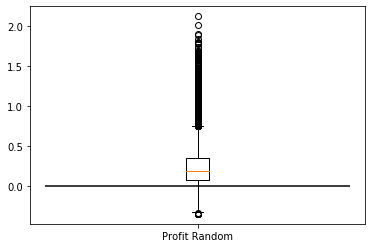

In [5]:
plt.boxplot(p, labels=['Profit Random'])
plt.hlines(y=0, xmin=0, xmax=2)
plt.show()

In [6]:
print("Median Profit =",round(median*100,2))
print("Mean Profit =",round(p.mean()*100,2))

Median Profit = 19.19
Mean Profit = 22.94
